# Lecture 13: Biometric Person/Speaker Recognition

The concepts here are also applicable to most other biometric signals.

Biometric Characteristics are: 
- $\bf{Physiological}$: face, fingerprint, iris, hand geometry, DNA, palmprint
- $\bf{Behavioral}$: handwriting, signature, typing rhythm, gait
- $\bf{both}$: voice

It can be simplified as just a pattern recognition problem: 

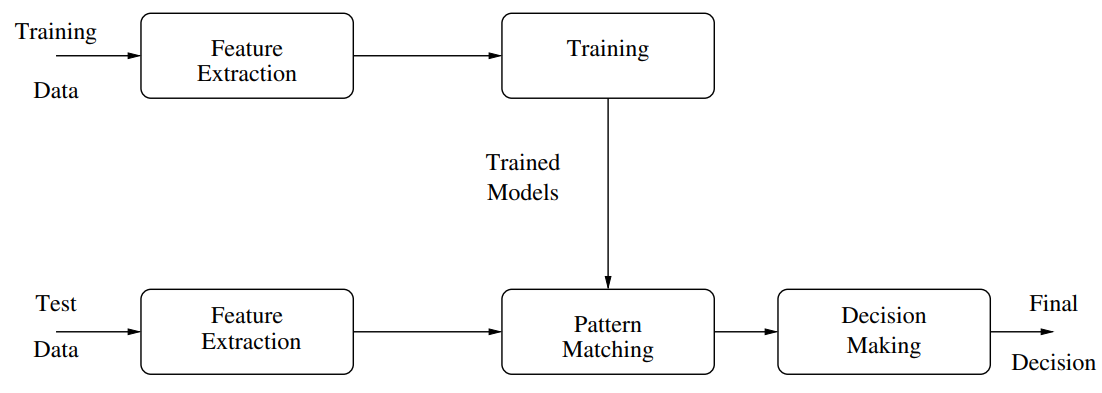

Now we can also categorise all biometric recognition tasks into only two tasks: 

- $\bf{Person\space Identification}$: to identify a person from a finite set of persons (given a biometric signal), which comes back to the equation $P(I = I_{c} | X) \ge P(I = I_{l} | X), \forall l \ne c$. (Pattern Classification Problem)
- $\bf{Person\space Verification}$: to verify a claimed identity of a person, which comes back to the equation $$\frac{P(I = I_{c} | X)}{P(I = \bar{I_{c}} | X)} \ge \Delta$$

## Similarity Measures

Given a biometric signa;/feature sequence X, the probability that it belongs to a person (rather than some other persion) is given by: $$P(I_{c} | X) = \frac{P(X | I_{c})\cdot P(I_{c})}{P(X)} = \frac{P(X | I_{c})\cdot P(I_{c})}{\sum_{i=1}^{I}P(X | I_{i})\cdot P(I_{i})}$$

Ideally, the sum in the denominator should include all possible persons.

### Person Identification

In this case, after training, P(X) is a constant, and person I will be identified as person $I_{c}$ if: $P(X | I_{c}) \ge P(X | I_{i}), \forall i \ne c$

### Person Verification

This is a sort of a hypothesis test. In this case, we will verify the hypothesis that a person I s indeed the putative person $I_{c}$ if $P(I_{c} | X) > P(\bar{I_{c}} | X)$, where $\bar{I_{C}}$ represents the set of all possible rival persons, and the right hand side is the probability of the person being anyone except $I_{c}$.

Typically, this is stated with some margin or threshold, a person I is taken to be the person $I_{c}$ if: $$\frac{P(I_{c} | X)}{P(\bar{I_{c}} | X)} > \delta$$ where $\delta$ is a threshold > 1.

Estimating $P(\bar{I_{c}} | X)$ is going to be a complex problem to solve, because this is an open-set problem. 

$P(\bar{I_{c}} | X) = P(I_{1}\space or\space I_{2}\space or\space ... \space or\space I_{i\ne c} | X) = \sum_{i\ne c} P(I_{i} | X)$

Now $P(I_{c} | X) = \frac{P(X | I_{c})\cdot P(I_{C})}{P(X)}$ 

and $P(X) = P(X | I_{c})\cdot P(I_{c}) + P(X | \bar{I_{c}})\cdot P(\bar{I_{c}}) = \frac{P(X | I_{c})\cdot P(I_{c})}{P(X | I_{c})\cdot P(I_{c}) + P(X | \bar{I_{c}})\cdot P(\bar{I_{c}})} = \frac{1}{1 + \frac{P(X | \bar{I_{c}})\cdot P(\bar{I_{c}})}{P(X | I_{c})\cdot P(I_{c})}}$

Assuming equal priors, we will get $\frac{1}{1 + \frac{P(X | \bar{I_{c}})}{P(X | I_{c})}}$

Now maximizing $P(I_{c} | X)$ means minimizing $\frac{P(X | \bar{I_{c}})}{P(X | I_{c})}$ or rather maximizing $\frac{P(X | I_{c})}{P(X | \bar{I_{c}})}$ 

So it comes down to maximizing the likelihood of it being the speaker over the likelihood of it not being the speaker. 

If events $I_{i}$ are independant (which is the case) and collectively exhaustive (which will often not be the case), so consequently, 

$$ I = I_{c} \space if\space \frac{P(X | I_{C})}{P(X | \bar{I_{c}})} = \frac{P(X | I_{c})}{\sum_{i \ne c}P(X | I_{i})} > \delta  $$

Which is what we call the likelihood ratio criterion, and where the sum over i incorporates all the possible persons.

Alternatively: $$I = I_{c} \space if\space log(P(X | I_{c})) - log(P(X | \bar{I_{c}})) > \Delta = log(\delta)$$

- Closed set = {$S_{1}, S_{2}, ..., S_{K}$}
- Open set $\rightarrow$ the speaker classified may not be part of the set of speakers

Speaker Identification followed by a Speaker Verification systems, to know whether the answer is accepted or rejected. Input to the Speaker Identification will be the input signal, output is the ID, input to the Speaker Verification would be both the ID & the input signal.

## Design of Speaker Identification system

This is a simple classifier, which can be based on Gaussians, or GMMs. We can also train a NN to classify speakers.

## Design of Speaker Verification system

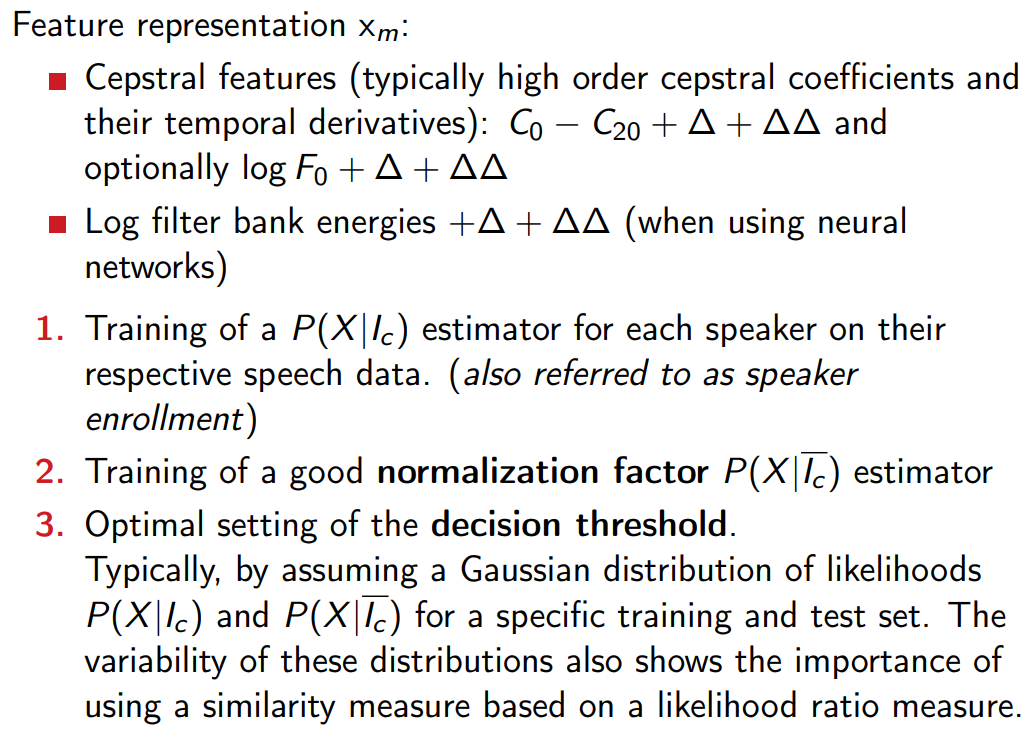

### Estimating the Likelihood Ratio

- #### $P(X | I_{c})$

![Screenshot 2026-01-29 213729.png](<attachment:Screenshot 2026-01-29 213729.png>)

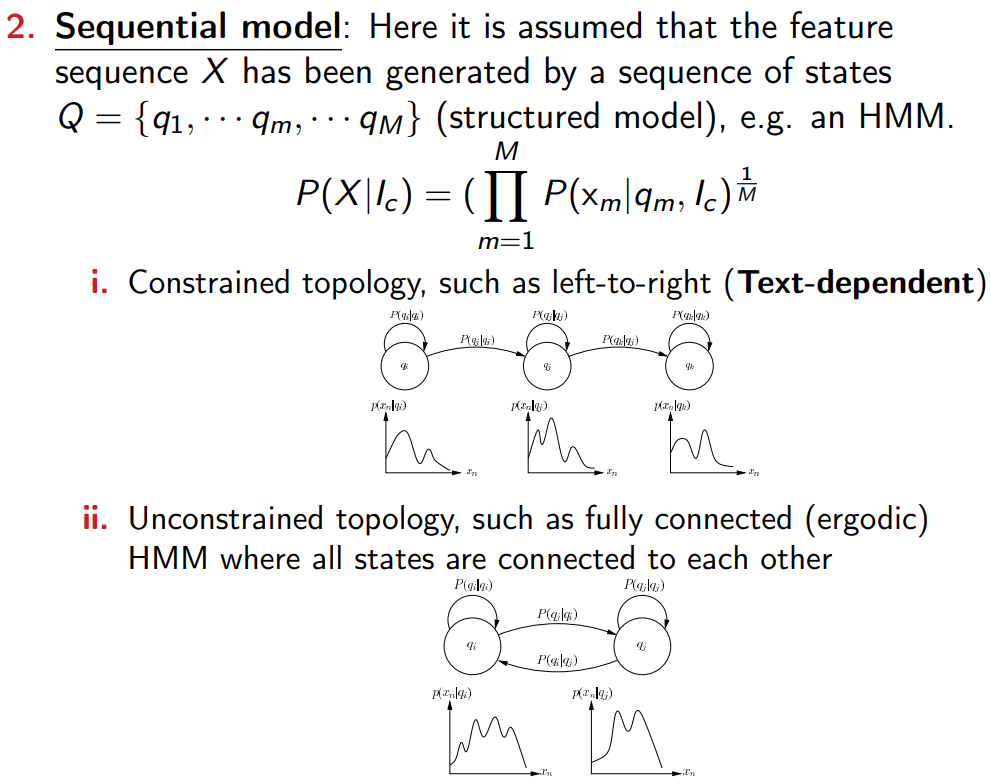

Text-dependent means that we are fixing what the speaker is saying, which is very much better than text-independent systems, we can just compare the sequence of features of the expected words/states, dynamic time warping DTW, comparing two sequences, and checking the distances between them, and here we would have to decide for a threshold for our decision. We train, get a same-speaker distribution and a different-speaker distribution, and based on that we decide the threshold.  

- #### $P(X | \bar{I_{c}})$

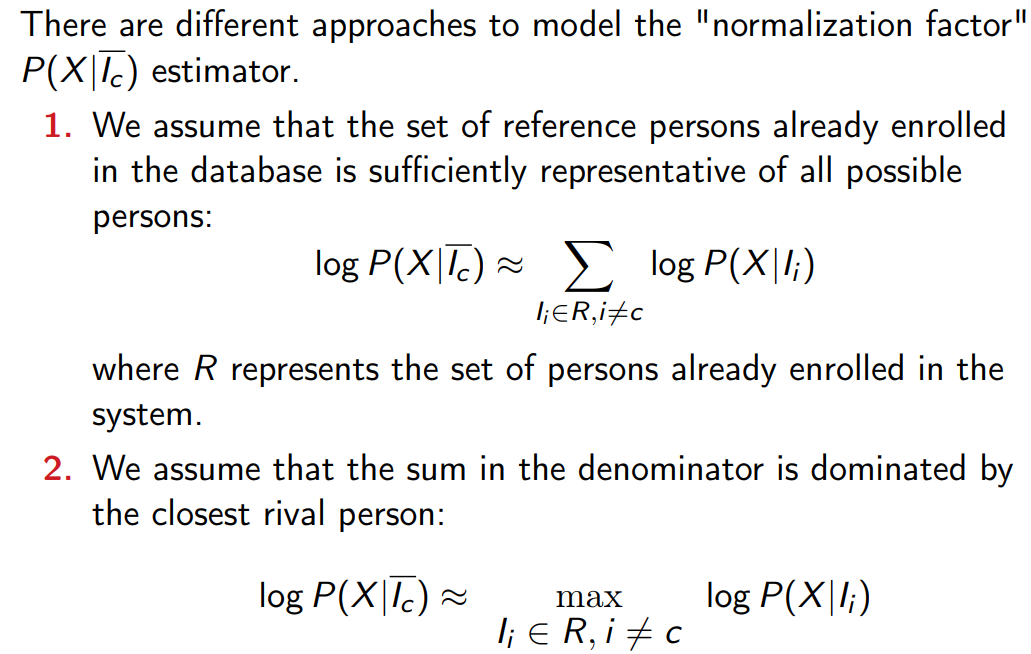

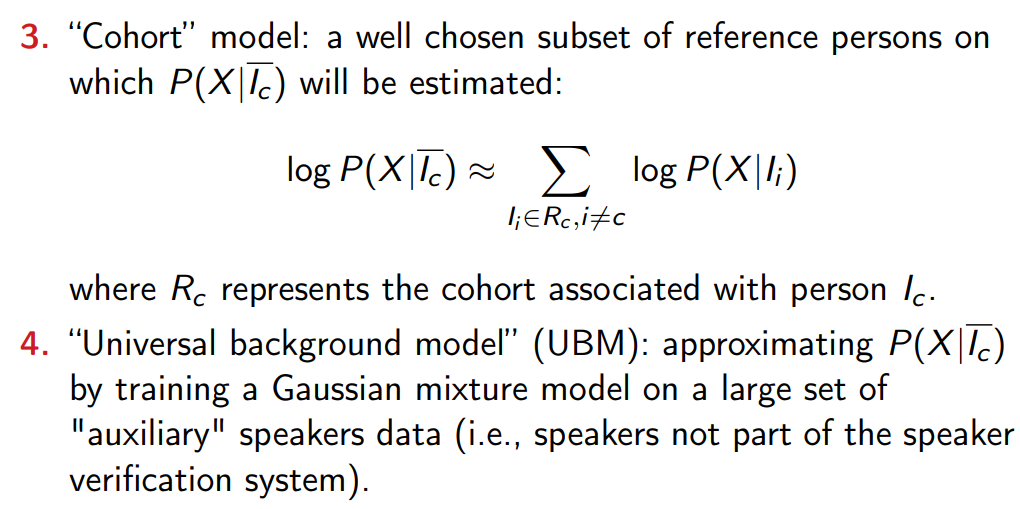

- #### Current way

This is a way of looking at the likelihood estimates, but the modern way is not all the same, we mainly use a universal background model GMM. This method is called the speaker embeddings-based approach. The goal being it is training and adapting the universal background GMM, and then when enrolling a new speaker, we adapt the means of their GMM, to be projected to a lower-dimension vector, used to check the best projection that will make this speaker as distinct as possible from others, this is the i-vector. Another way is to use the x-vectors, which is training a NN to classify speakers, and when enrolling speakers, we take the speech signal, pass it through the NN and take an intermediate layer's outcome and take it as the x-vector, still being distinct and lower-dimensional than the speech signal or its extracted features.

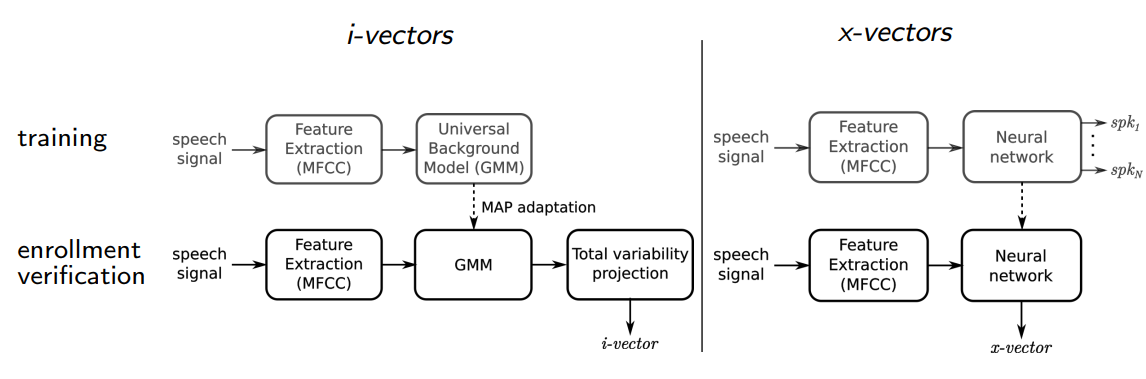

During test time, a LDA (Linear Discriminant Analysis) can be performed on the enrollment vectors, and on the speaker vector separately, and then we run a Probabilistic LDA and get the score.

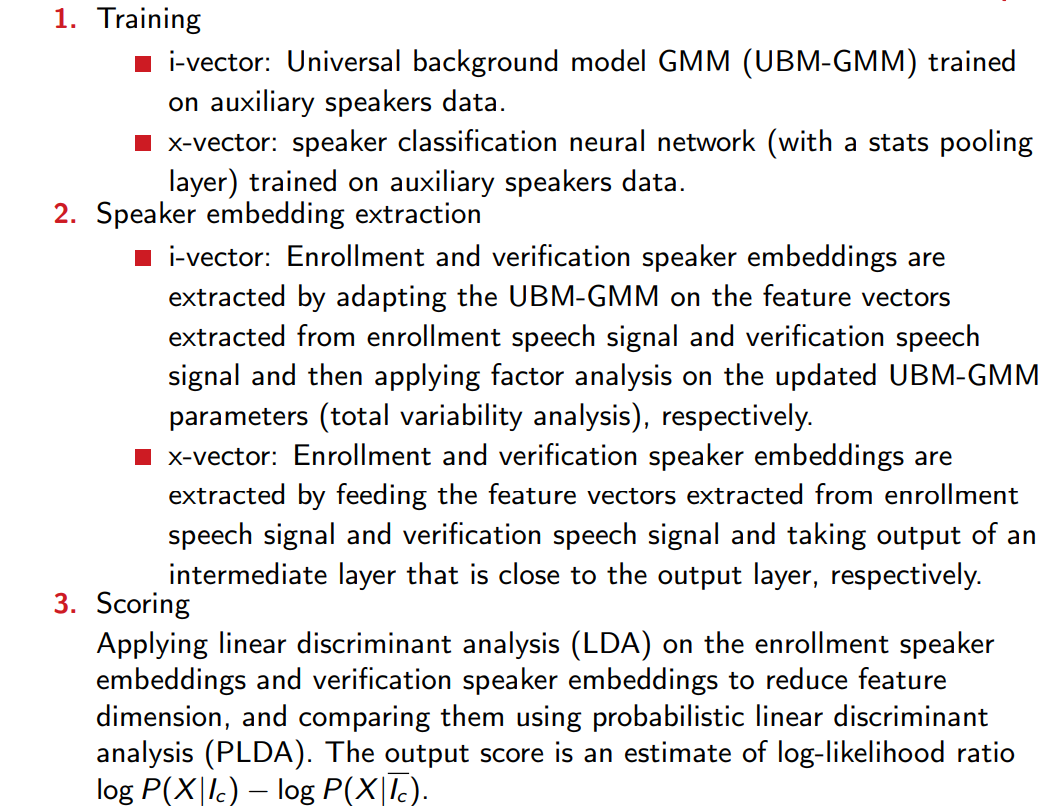
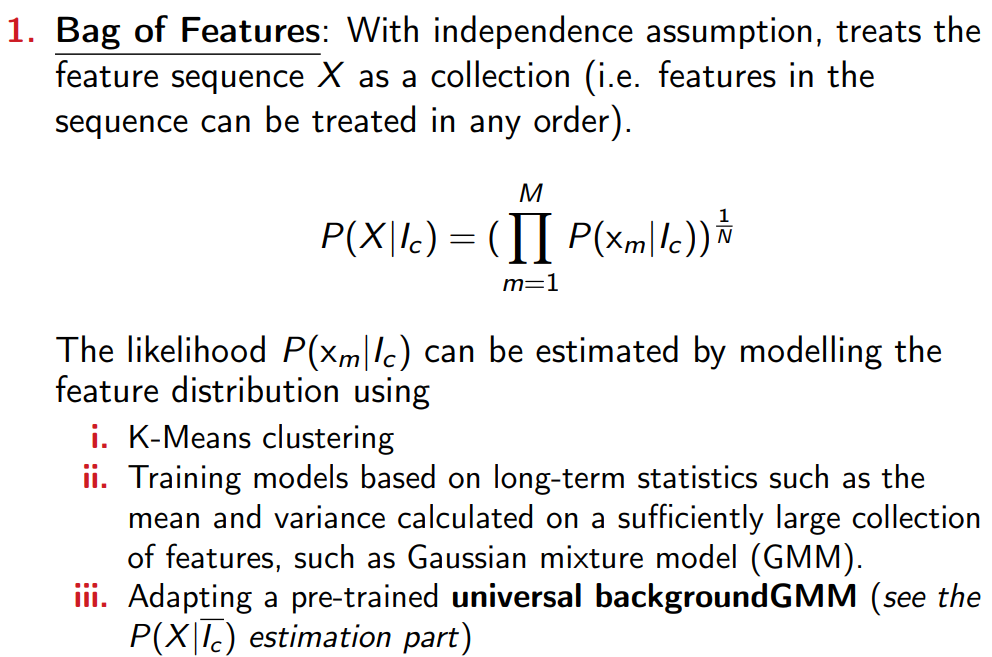

### Estimating the decision threshold

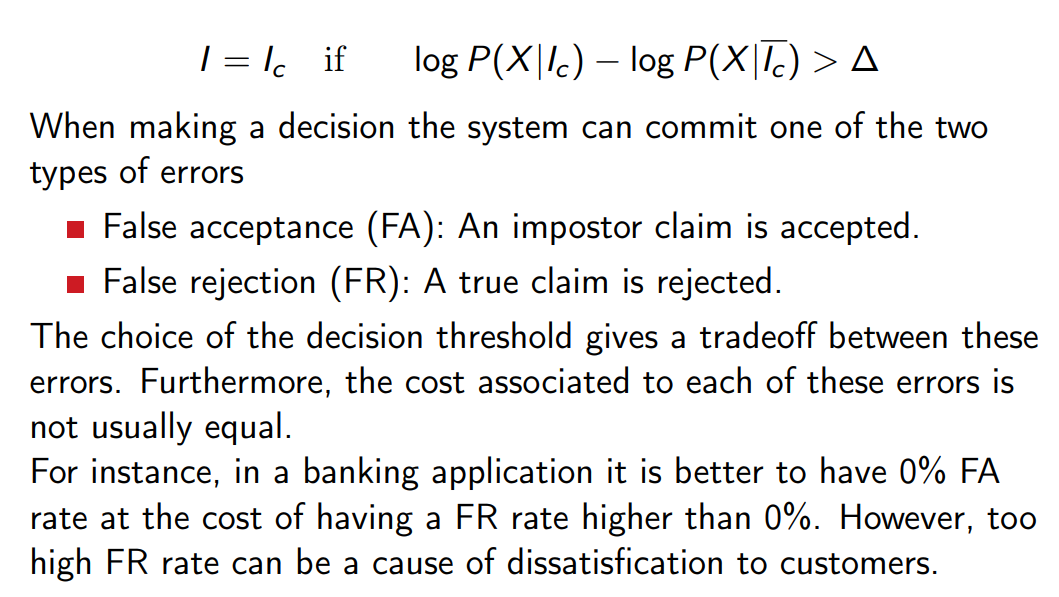

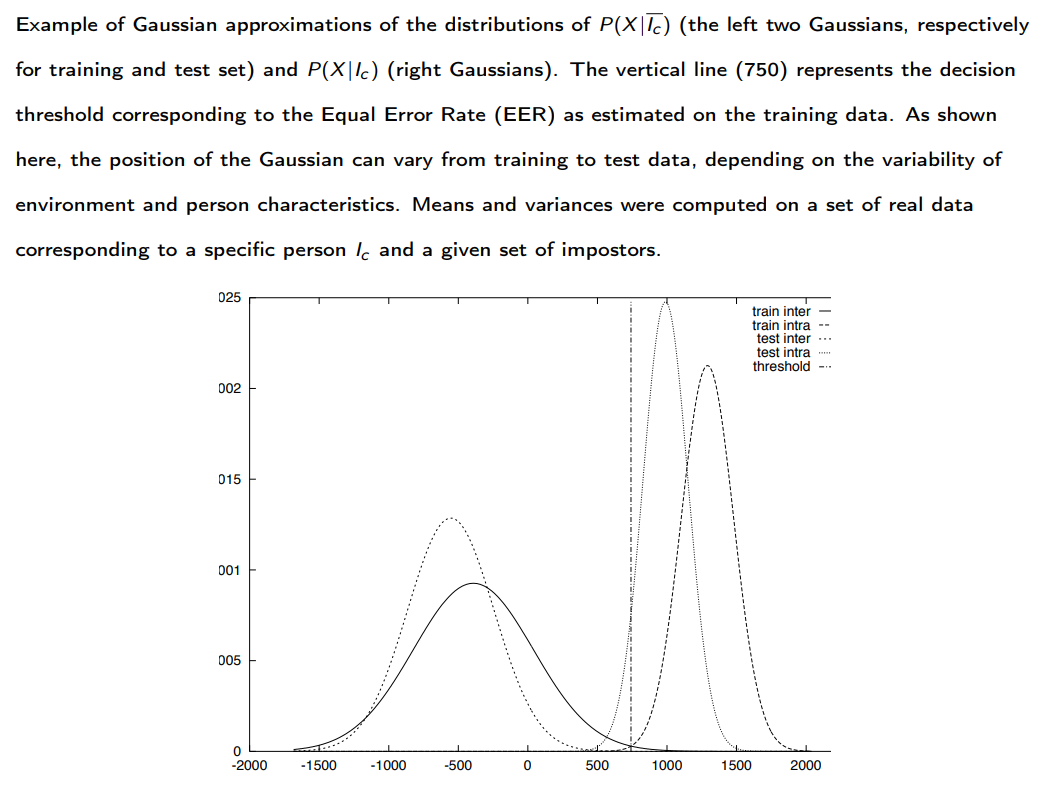

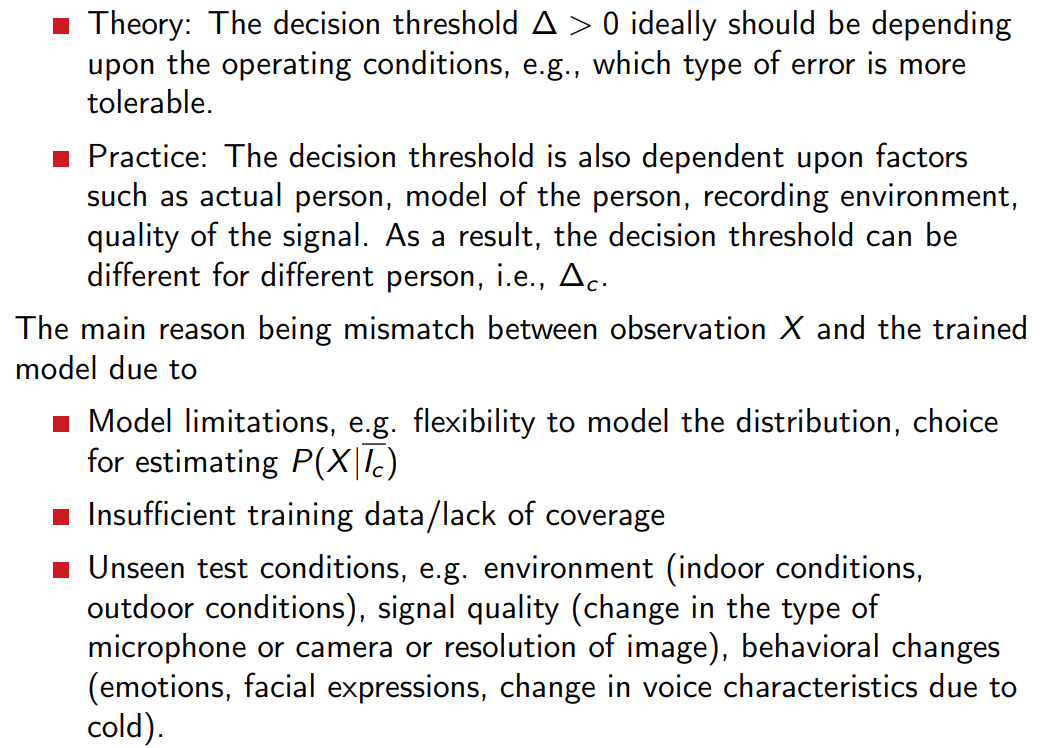

To deal with this, we apply score normalization, to make the decision threshold $\Delta$ tuning easier. 

#### Score normalization

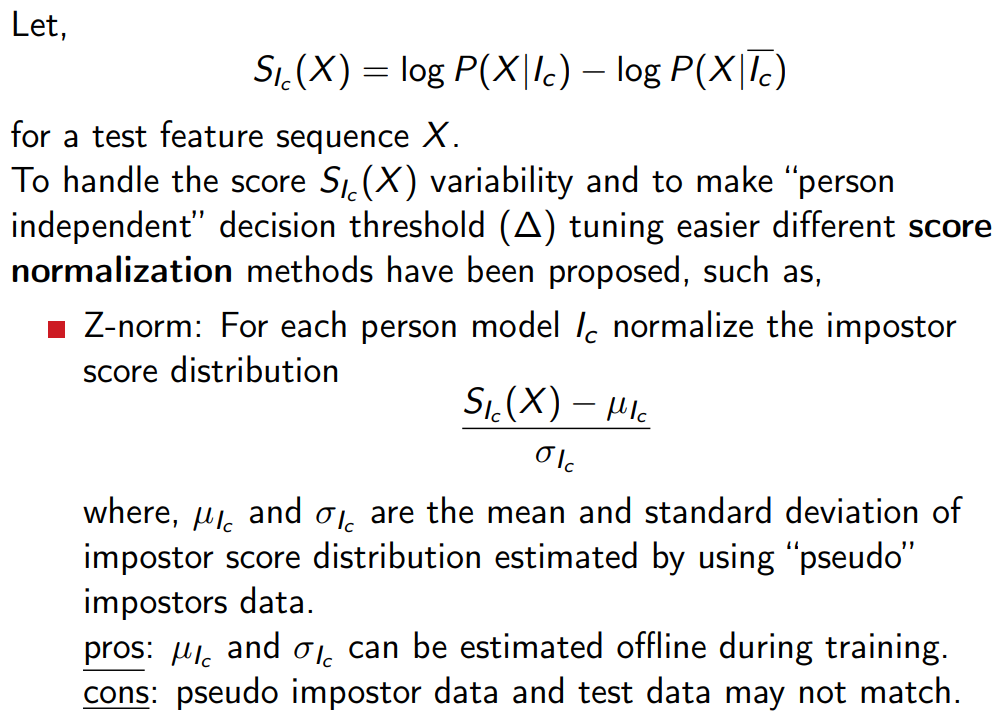

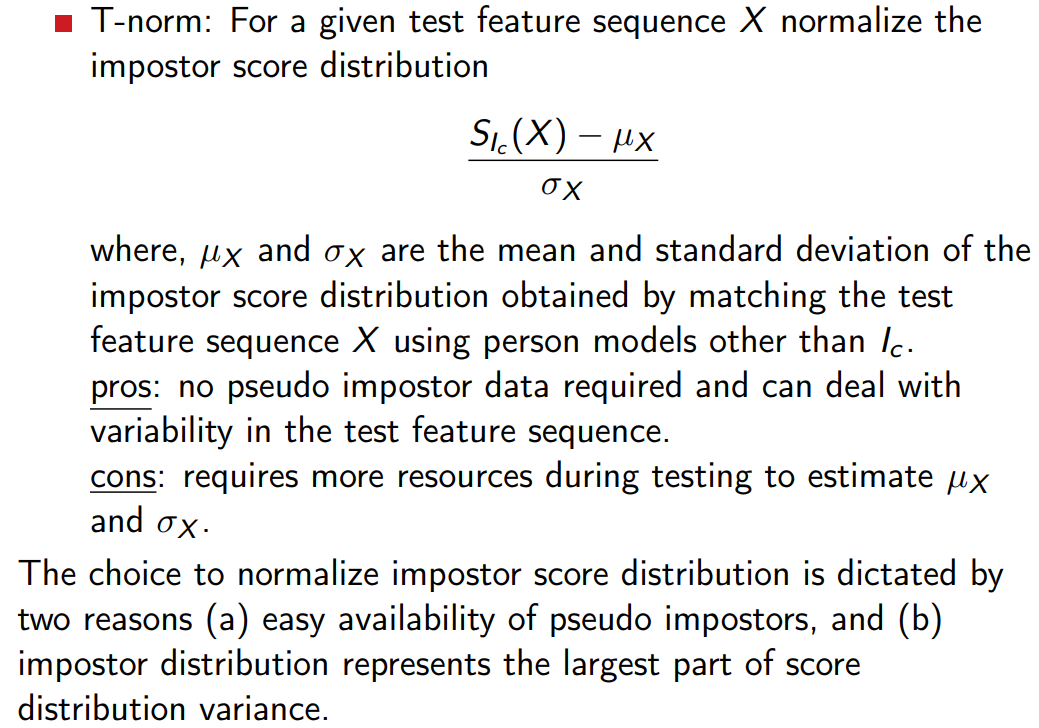

## Evaluation Measures

To evaluate a Speaker Recognition system, we would have to get a speaker data (speech data), their claim, and the expected decision

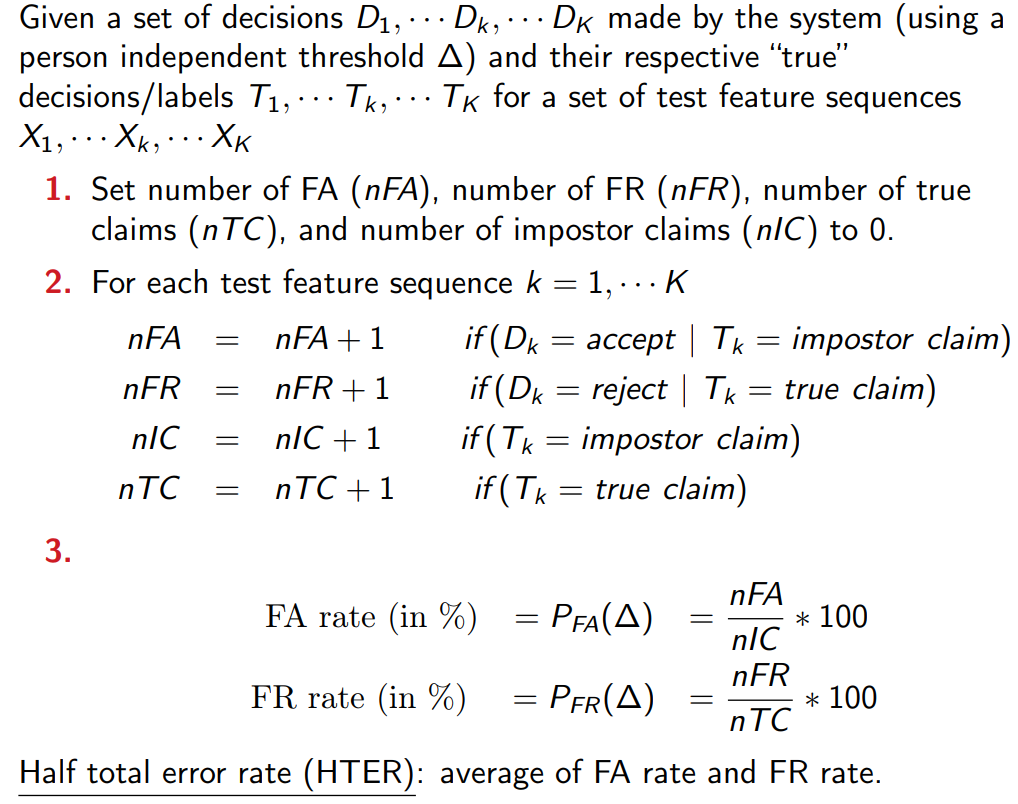

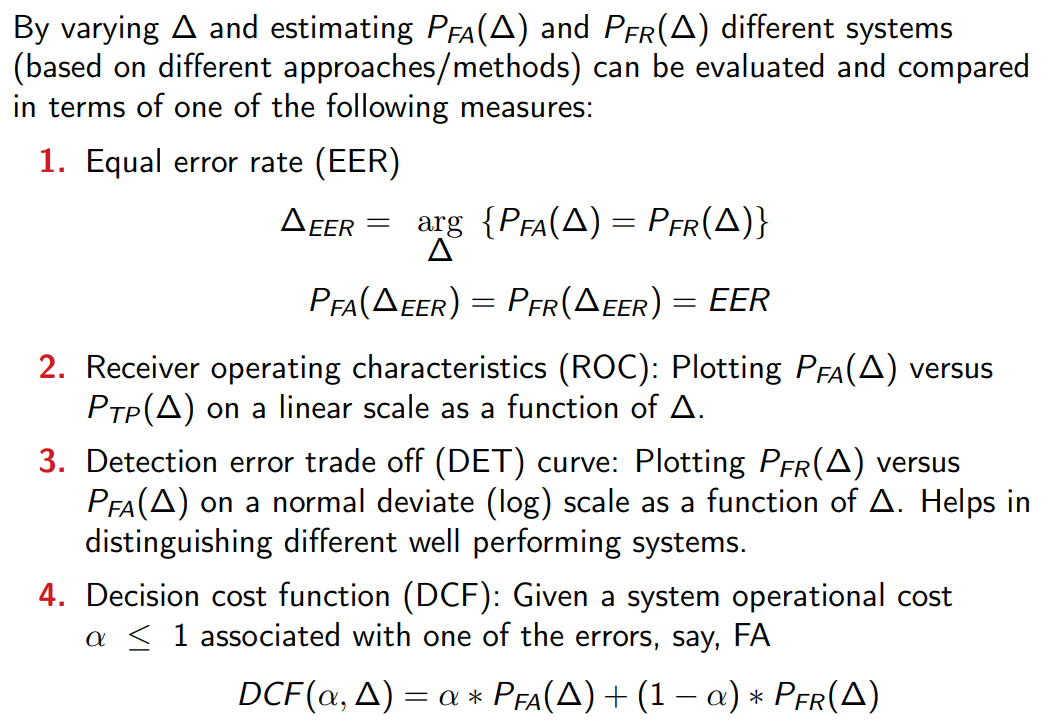

Getting an EER for different systems is the way to compare between different systems.

## Presentation Attacks

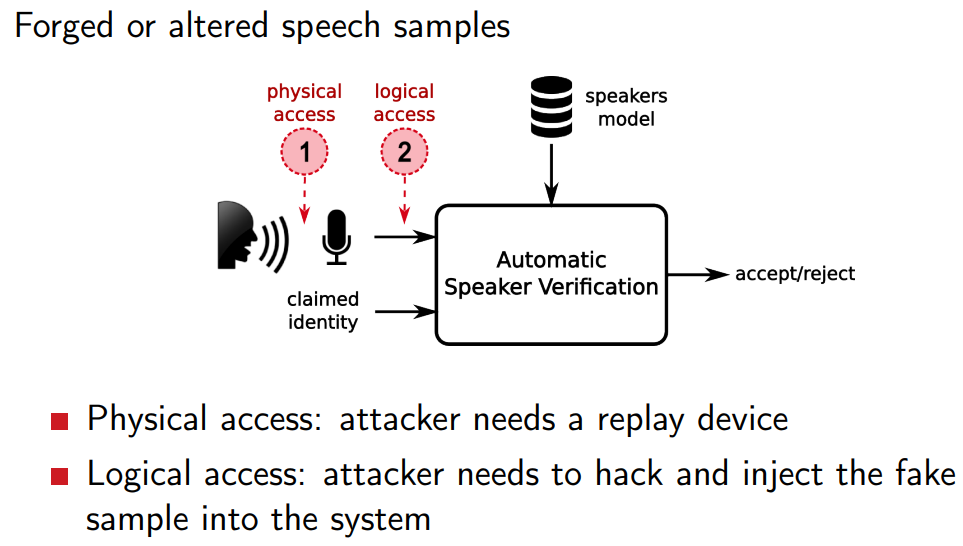

Hackers can record the person's voice and play it to the system (physical access attack). Hackers can have inject the fake sample into the system (logical access attack).

It can be that the hackers recorded the person's voice and replay it to the system, it can be that they performed speech synthesis and gave the synthesized speech to the system, it can be that they used a voice converter and gave it to the system. 

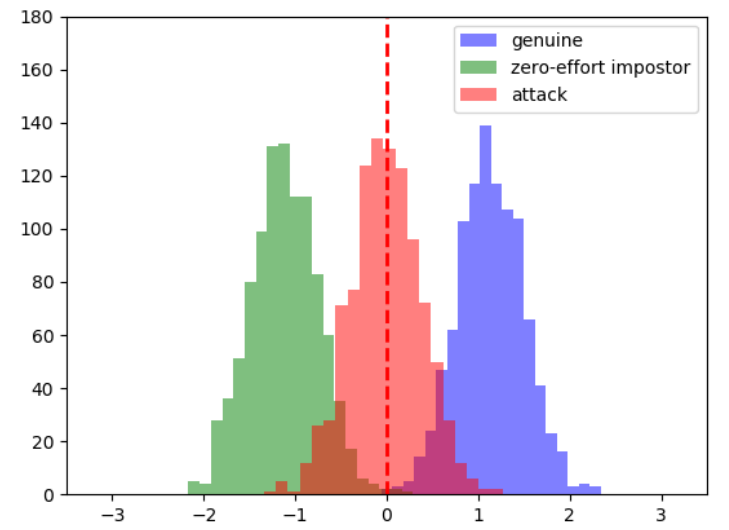

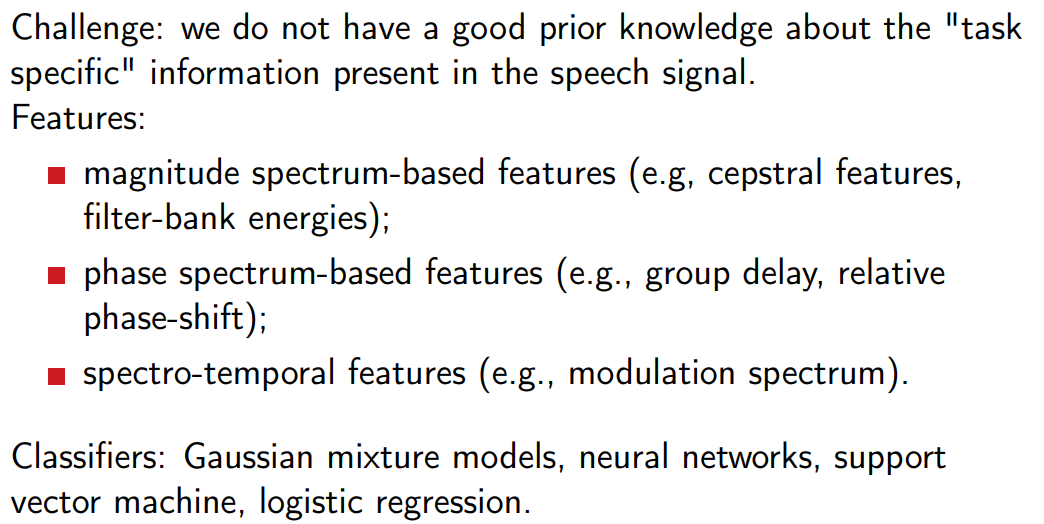

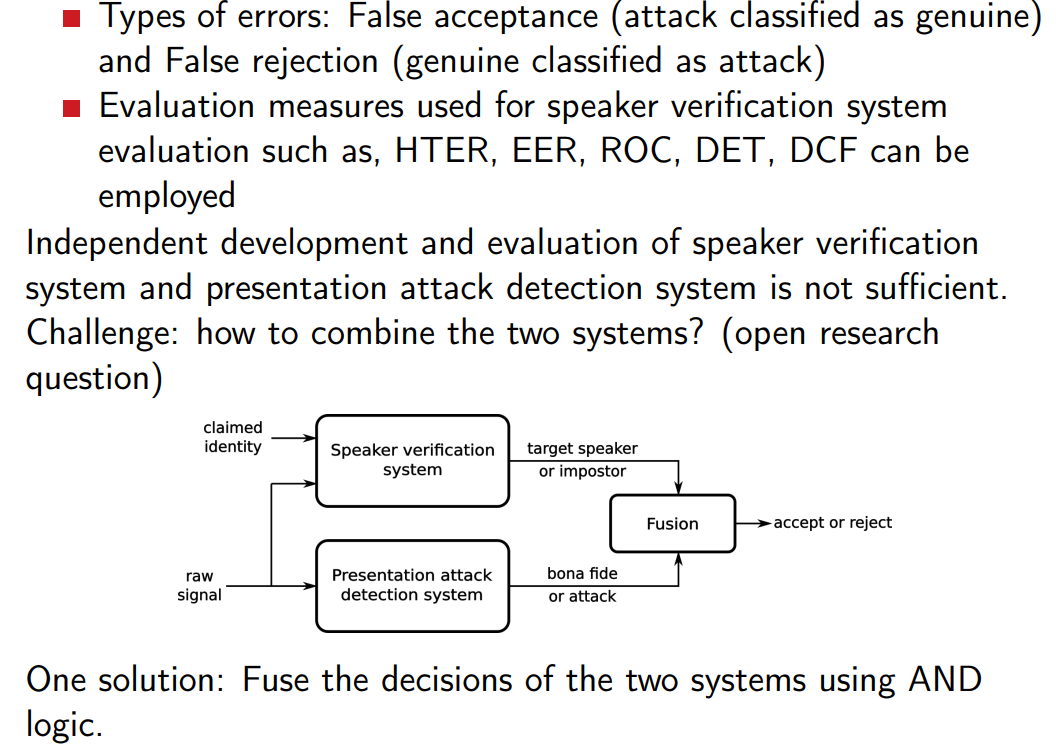

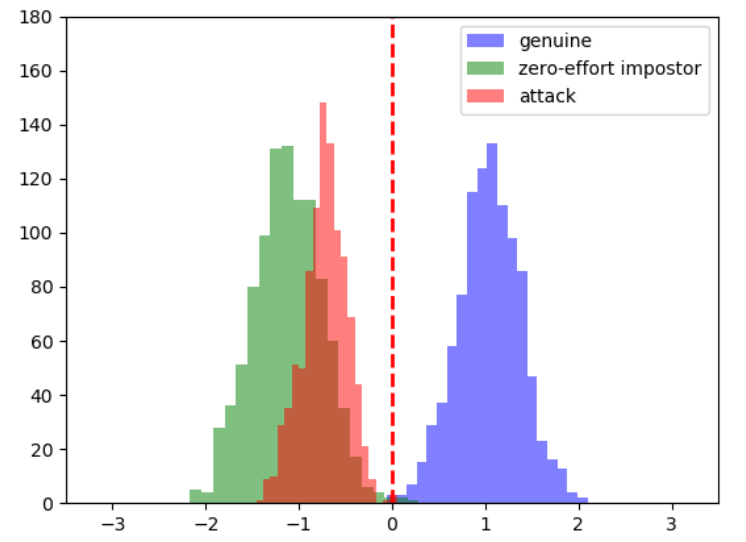